In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
from matplotlib import pyplot as plt


In [3]:
final_log = {}
for method in os.listdir("./hz-bc-tyc_1"):
    final_log[method] = pickle.load(open('./hz-bc-tyc_1/%s/log.pkl' % method, 'rb'))[-1]

In [4]:
metrics = ['avg_speed', 'travel_time', 'waiting_time', 'fuel_consumption', 'CO_emission', 'CO2_emission']

In [5]:
data = pd.DataFrame(columns=['method'] + metrics)
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for log in veh_logs:        
        row = {
            'method': k,
            'avg_speed': log['avg_speed'],
            'travel_time': log['travel_time'],
            'waiting_time': log['waiting_time'],
            'fuel_consumption': log['fuel_consumption'],
            'CO_emission': log['CO_emission'] / 1000000,
            'CO2_emission': log['CO2_emission'] / 1000000,
        }
        data = data.append(row, ignore_index=True)

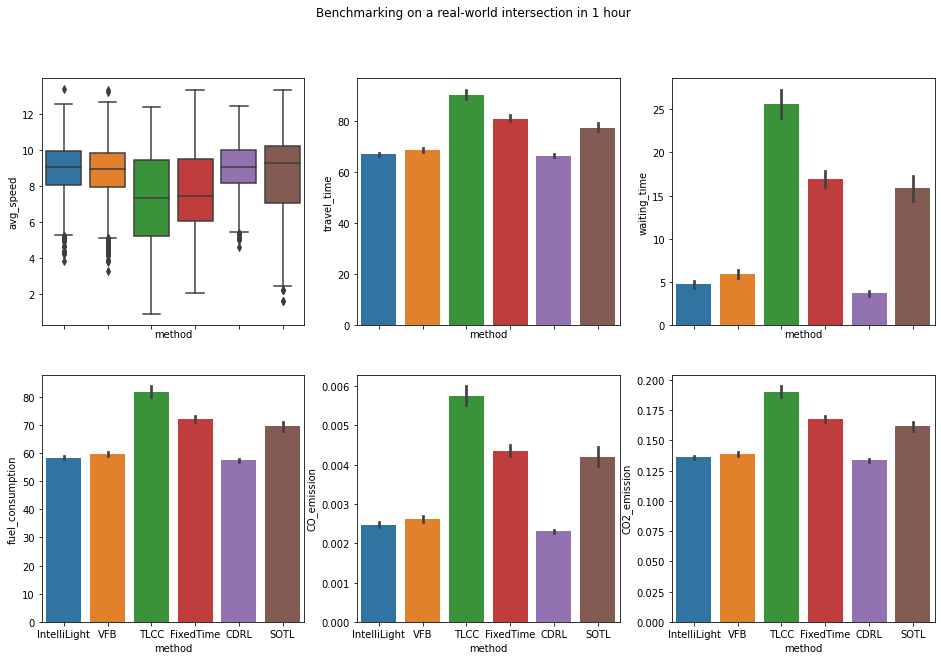

In [31]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,10))
fig.suptitle('Benchmarking on a real-world intersection in 1 hour')
sns.boxplot(ax=axes[0, 0], x="method", y='avg_speed', data=data)
sns.barplot(ax=axes[0, 1], x="method", y='travel_time', data=data)
sns.barplot(ax=axes[0, 2], x="method", y='waiting_time', data=data)
sns.barplot(ax=axes[1, 0], x="method", y='fuel_consumption', data=data)
sns.barplot(ax=axes[1, 1], x="method", y='CO_emission', data=data)
sns.barplot(ax=axes[1, 2], x="method", y='CO2_emission', data=data)
plt.savefig('output.svg')

In [42]:
final_log = {}
for method in os.listdir("./atlanta/"):
    final_log[method] = pickle.load(open('./atlanta/%s/log.pkl' % method, 'rb'))[-1]

In [55]:
data = pd.DataFrame(columns=['method', 'step', 'intersection', 'waiting_time'])
avg_speed = 0
for method in ['IntelliLight', 'SOTL']:
    for intersection in range(len(final_log[method]['tf_logs'])):
        for k, v in final_log[method]['tf_logs'][intersection].items():
            if k == 'lanes':
                continue
            w = np.mean(v['waiting_time'])
            if w < 0:
                print("???")
            data = data.append({
                'method': method,
                'intersection': intersection,
                'step': k,
                'waiting_time': w
            }, ignore_index=True)

KeyError: 'TLCC'

In [50]:
for i in range(5):
    print(final_log['IntelliLight']['tf_logs'][i]['lanes'])

['-290405874#2_0', '-290405874#2_1', '-354587522#2_0', '-354587522#2_1', '290405872#0_0', '290405872#0_1', '354587523_0', '354587523_1']
['-9247806#2_0', '-354587522#6_0', '-354587522#6_1', '354587522#0_0', '354587522#0_1']
['354587522#3_0', '354587522#3_1', '-611582485#3_0', '-354587522#9_0', '-354587522#9_1', '9258925#0_0']
['354587522#7_0', '354587522#7_1', '-198659569#3_0', '-631653294#2_0', '-631653294#2_1', '9246225#4_0']
['631653294#0_0', '631653294#0_1', '-505912698#0_0', '-505912698#0_1', '-354587521#1_0', '-354587521#1_1', '-234013266#1_0', '-234013266#1_1']


In [54]:
for i in range(5):
    print(final_log['FixedTime']['tf_logs'][i]['lanes'])

['-290405874#2_0', '-290405874#2_1', '-354587522#2_0', '-354587522#2_1', '290405872#0_0', '290405872#0_1', '354587523_0', '354587523_1']
['-9247806#2_0', '-354587522#6_0', '-354587522#6_1', '354587522#0_0', '354587522#0_1']
['354587522#3_0', '354587522#3_1', '-611582485#3_0', '-354587522#9_0', '-354587522#9_1', '9258925#0_0']
['354587522#7_0', '354587522#7_1', '-198659569#3_0', '-631653294#2_0', '-631653294#2_1', '9246225#4_0']
['631653294#0_0', '631653294#0_1', '-505912698#0_0', '-505912698#0_1', '-354587521#1_0', '-354587521#1_1', '-234013266#1_0', '-234013266#1_1']


In [45]:
for i in range(5):
    print(i, np.mean(data[(data['method'] == 'SOTL') & (data['intersection'] == i)]['waiting_time']))
    print(i, np.mean(data[(data['method'] == 'IntelliLight') & (data['intersection'] == i)]['waiting_time']))

0 417.3235370950888
0 16.289479166666666
1 14.996029258098224
1 2036.2761666666668
2 20.574625566004876
2 0.7075462962962963
3 266.1169453152212
3 3.6594907407407407
4 798.301789446186
4 10.066736111111112


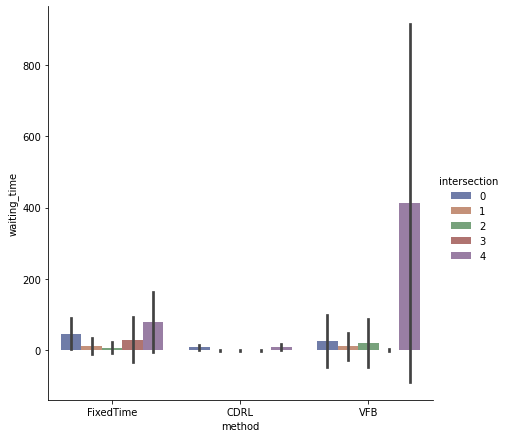

In [7]:
sns.catplot(
    data=data, kind="bar",
    x="method", y="waiting_time", hue="intersection",
    ci="sd", palette="dark", alpha=.6, height=6
)

import tikzplotlib

tikzplotlib.save("atlanta.tex")

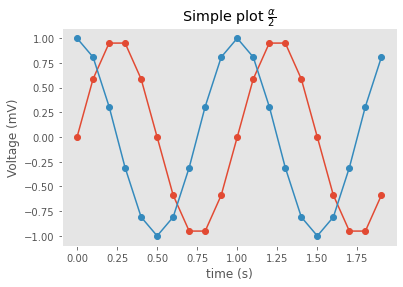

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

t = np.arange(0.0, 2.0, 0.1)
s = np.sin(2 * np.pi * t)
s2 = np.cos(2 * np.pi * t)
plt.plot(t, s, "o-")
plt.plot(t, s2, "o-")
plt.xlabel("time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Simple plot $\\frac{\\alpha}{2}$")
plt.grid(False)

import tikzplotlib

tikzplotlib.save("test.tex")